In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from time import time
import cv2
from random import randint
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
from sklearn.model_selection import train_test_split

2.15.0


In [ ]:
#@title Acceder al Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# directorio local en Google Drive
path = 'gdrive/My Drive/IA' #@param {type:"string"}
path_entrenamiento = '/train'  #@param {type:"string"}
path_prueba = '/test'  #@param {type:"string"}

imagPath_train = path + path_entrenamiento
imagPath_test = path + path_prueba

Mounted at /content/gdrive


In [ ]:
TRAINING_DIR = imagPath_train
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
VALIDATION_DIR = imagPath_test
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(350,350),
    class_mode='categorical',
    batch_size=8
)

Found 239 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(350,350),
    class_mode='categorical',
    batch_size=8
)

Found 59 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(350, 350, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Dropout(0.25),
    # 2nda capa
    tf.keras.layers.Conv2D(64, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 3era capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 4ta capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    # 5ta capa
    tf.keras.layers.Conv2D(128, (3,3),padding = 'Same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    # Se aplanan los parametros para insertar en el DNN
    tf.keras.layers.Flatten(),
    # Capa oculta de 512 neuronas
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 346, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 115, 115, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 115, 115, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 115, 115, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 57, 57, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 57, 57, 64)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

epochs = 10

history = model.fit_generator(train_generator,
                              epochs = epochs, validation_data = validation_generator,
                              verbose = 1,validation_steps=3)

Epoch 1/10
30/30 [==============================] - 155s 5s/step - loss: 2.0481 - accuracy: 0.2008 - val_loss: 1.9417 - val_accuracy: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 77s 3s/step - loss: 1.7628 - accuracy: 0.3180 - val_loss: 1.8918 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 74s 2s/step - loss: 1.3411 - accuracy: 0.4184 - val_loss: 1.4303 - val_accuracy: 0.3750
Epoch 4/10
30/30 [==============================] - 74s 2s/step - loss: 1.1410 - accuracy: 0.5649 - val_loss: 1.3439 - val_accuracy: 0.5833
Epoch 5/10
30/30 [==============================] - 70s 2s/step - loss: 1.2832 - accuracy: 0.5439 - val_loss: 1.4040 - val_accuracy: 0.4167
Epoch 6/10
30/30 [==============================] - 70s 2s/step - loss: 1.0652 - accuracy: 0.5105 - val_loss: 0.9108 - val_accuracy: 0.6667
Epoch 7/10
30/30 [==============================] - 66s 2s/step - loss: 0.7174 - accuracy: 0.7155 - val_loss: 1.5827 - val_accuracy: 0.6667
Epoch 8/10
30/3

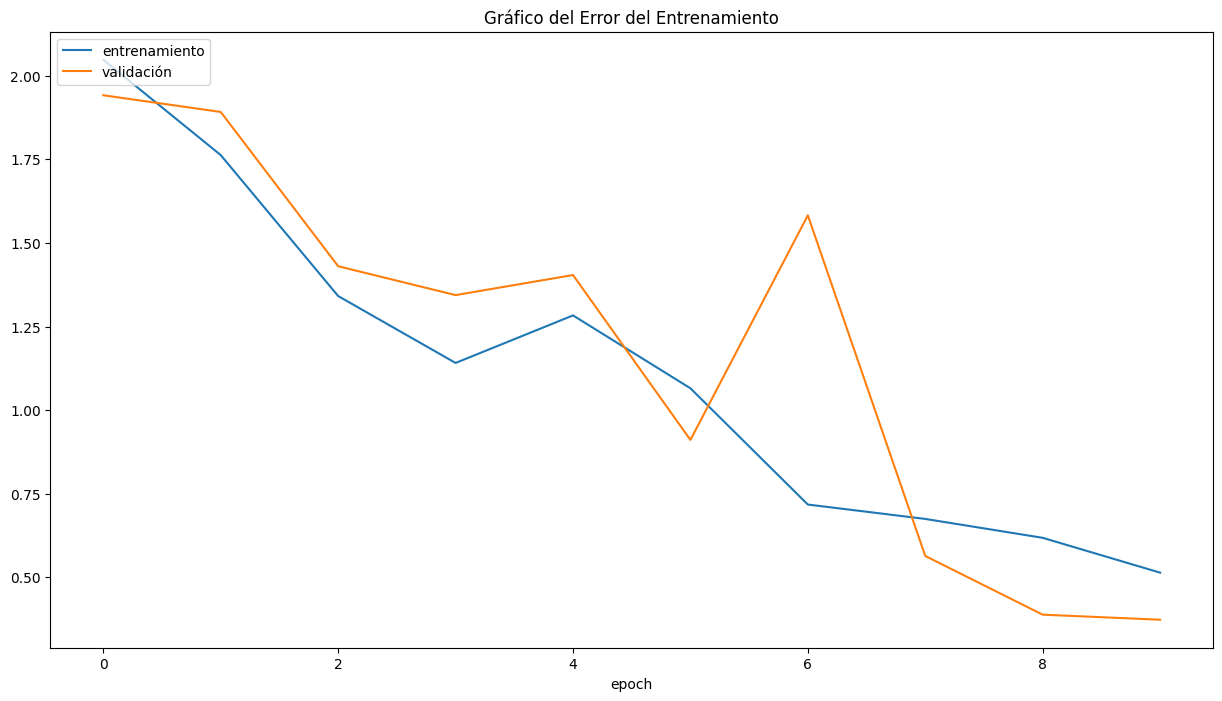

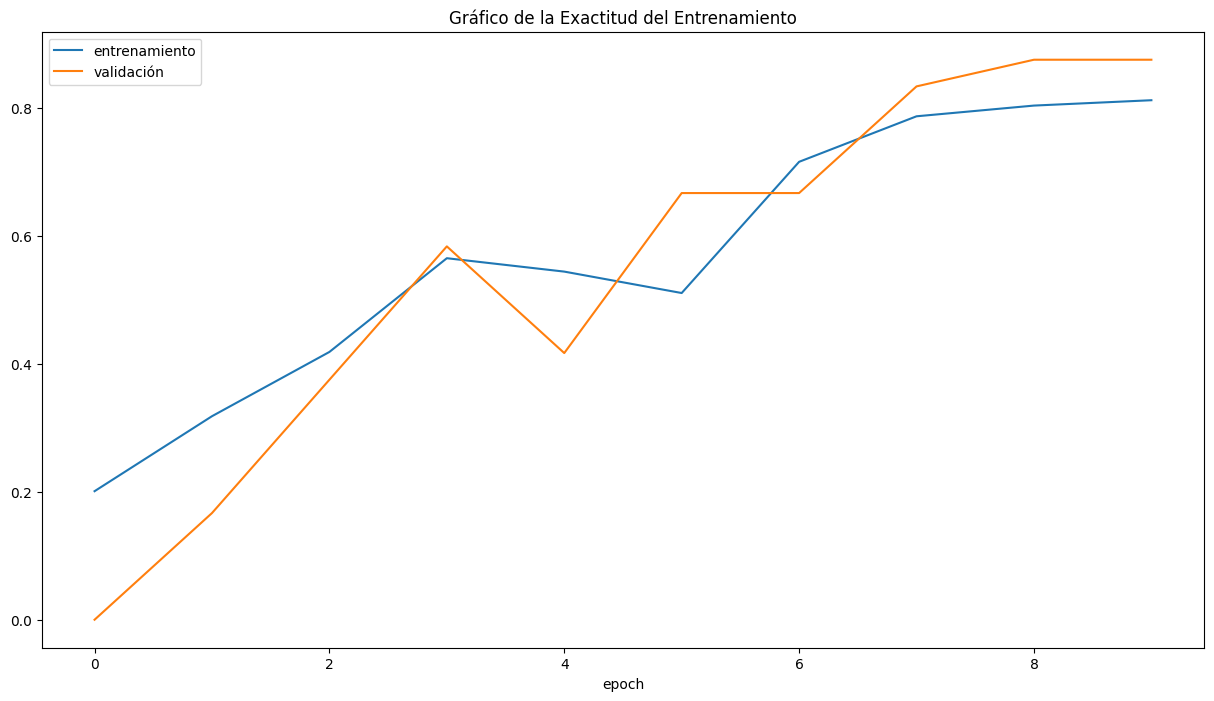

In [ ]:
import matplotlib.pyplot as plt
#@title Mostrar Gráficos del Entrenamiento
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gráfico del Error del Entrenamiento')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validación'], loc='upper left')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Gráfico de la Exactitud del Entrenamiento')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validación'], loc='upper left')
plt.show()

8/8 [==============================] - 9s 1s/step

 Reporte de Clasificación: 
              precision    recall  f1-score   support

           0       0.20      0.22      0.21         9
           1       0.22      0.22      0.22         9
           2       0.14      0.12      0.13         8
           3       0.20      0.22      0.21         9
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.10      0.12      0.11         8

    accuracy                           0.14        59
   macro avg       0.12      0.13      0.13        59
weighted avg       0.13      0.14      0.13        59



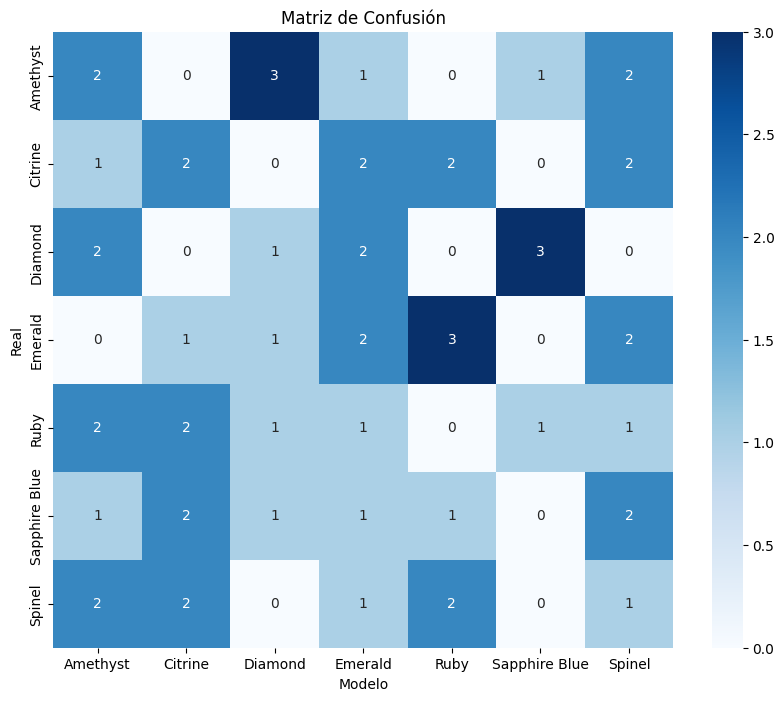

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report
import seaborn as sns

# Realiza predicciones en el conjunto de validación
val_steps = validation_generator.samples // validation_generator.batch_size
predictions = model.predict_generator(validation_generator, steps=val_steps+1, verbose=1)

# Convierte las predicciones en etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)

# Obtiene las etiquetas verdaderas del conjunto de validación
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(true_classes, predicted_classes))

# Construye la matriz de confusión
conf_matrix = confusion_matrix(true_classes[:len(predicted_classes)], predicted_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Modelo')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
